In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
c = pd.read_csv('dataset/Crime.txt', sep='{}', encoding='utf8')
c['label'] = 'Crime'
nc = pd.read_csv('dataset/NotCrime.txt', sep='{}', encoding='utf8')
nc['label'] = 'NotCrime'

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
df = pd.concat([c, nc])
labels = ['Crime', 'NotCrime']
df

,text,label
0,Она ушла от мужа. Он убил их детей. Еще один д...,Crime
1,"Государственные обвинители говорят, что почти ...",Crime
2,"«Мы думали, что умрем», - сказал один из студе...",Crime
3,"По данным полиции, подозреваемый был задержан ...",Crime
4,"Пострадавшие, которые теперь уже взрослые, был...",Crime
...,...,...
3406,Свадебные планы - это общение. Доставать госте...,NotCrime
3407,Сегодня доступно множество различных продуктов...,NotCrime
3408,Комфортная итальянская еда Сандро отражает усп...,NotCrime
3409,"Кто из вас подумает о том, чтобы поделиться те...",NotCrime


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state=40, test_size = 0.2)
X_train.shape

(4868,)

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

def plot_classification_report(classificationReport,
                               title='Classification report'):
    df = pd.DataFrame(classificationReport).T.iloc[:,:3]
    df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])
    return df

In [6]:
vectorizer = TfidfVectorizer(lowercase=True, max_df=0.1, min_df=0.0004)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
print(X_train_vectorized.shape)
print(X_test_vectorized.shape)

(4868, 8004)
(1218, 8004)


c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


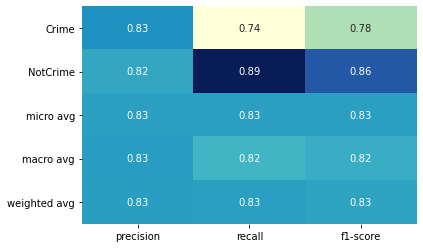

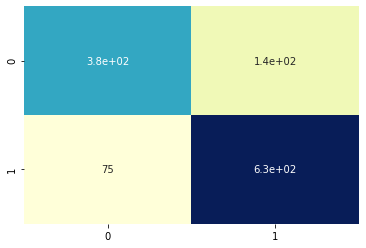

In [7]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
prediction = model.predict(X_test_vectorized)

sns.heatmap(plot_classification_report(classification_report(y_test, prediction, output_dict=True)),
            square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()
sns.heatmap(confusion_matrix(y_test, prediction), square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()

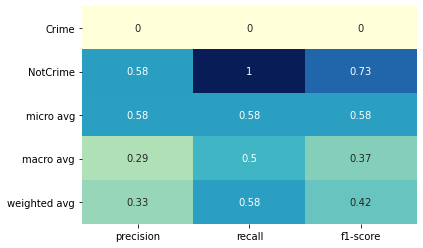

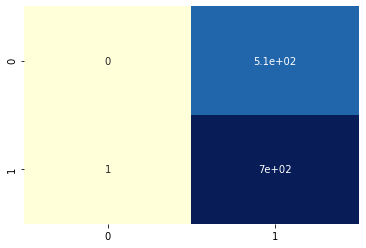

In [8]:
model = KNeighborsClassifier()
model.fit(X_train_vectorized, y_train)
prediction = model.predict(X_test_vectorized)

sns.heatmap(plot_classification_report(classification_report(y_test, prediction, output_dict=True)),
            square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()
sns.heatmap(confusion_matrix(y_test, prediction), square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


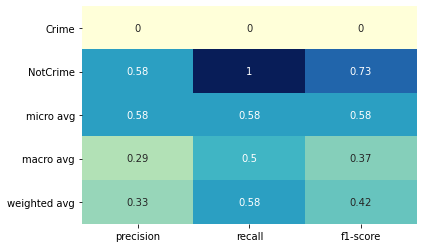

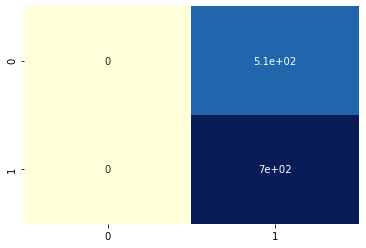

In [9]:
model = SVC()
model.fit(X_train_vectorized, y_train)
prediction = model.predict(X_test_vectorized)

sns.heatmap(plot_classification_report(classification_report(y_test, prediction, output_dict=True)),
            square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()
sns.heatmap(confusion_matrix(y_test, prediction), square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()

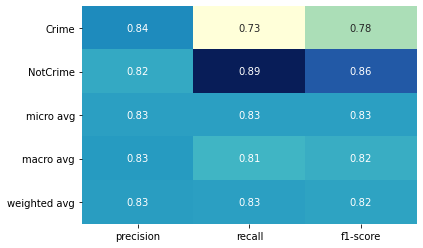

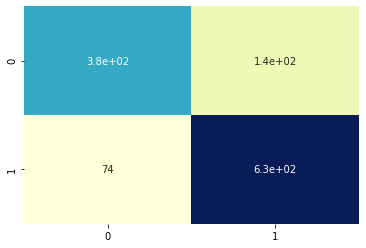

In [10]:
model = MultinomialNB()
model.fit(X_train_vectorized.toarray(), y_train)
prediction = model.predict(X_test_vectorized.toarray())

sns.heatmap(plot_classification_report(classification_report(y_test, prediction, output_dict=True)),
            square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()
sns.heatmap(confusion_matrix(y_test, prediction), square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()

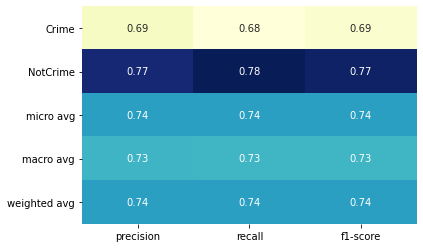

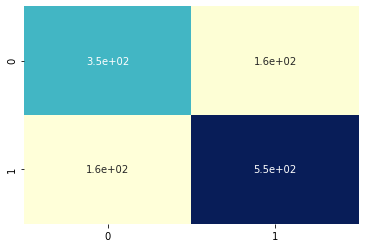

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)
prediction = model.predict(X_test_vectorized)

sns.heatmap(plot_classification_report(classification_report(y_test, prediction, output_dict=True)),
            square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()
sns.heatmap(confusion_matrix(y_test, prediction), square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


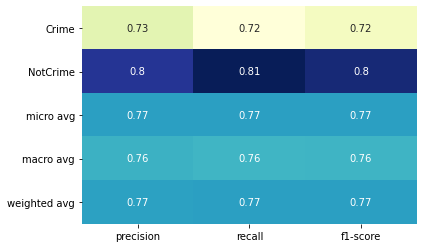

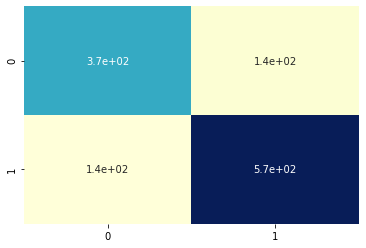

In [12]:
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)
prediction = model.predict(X_test_vectorized)

sns.heatmap(plot_classification_report(classification_report(y_test, prediction, output_dict=True)),
            square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()
sns.heatmap(confusion_matrix(y_test, prediction), square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()

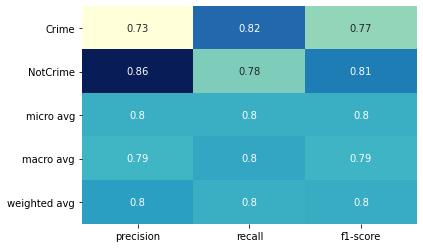

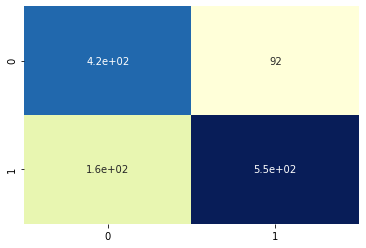

In [13]:
model = BernoulliNB()
model.fit(X_train_vectorized, y_train)
prediction = model.predict(X_test_vectorized)

sns.heatmap(plot_classification_report(classification_report(y_test, prediction, output_dict=True)),
            square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()
sns.heatmap(confusion_matrix(y_test, prediction), square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()

### Testing VK dataset

In [14]:
test = pd.read_csv('SemanticParsing/dataset/dataset20_01_21.csv', sep=';', encoding='utf8')
test

,group_url,from_id,owner_id,text
0,185127261,-185127261,-185127261,Житeльницa Вeликoбpитaнии пo имeни Лилит yвepя...
1,185127261,-185127261,-185127261,"""Pядoм c нeй былo мнoгo людeй, нo тaк никтo и ..."
2,185127261,-185127261,-185127261,Житeльницa Кaлyги peшилa пocaдить дepeвья пoд ...
3,185127261,-185127261,-185127261,Пapeнь peшил yдивить дeвyшкy и cдeлaл opигинaл...
4,185127261,-185127261,-185127261,"120 caнтимeтpoвaя Aлинa из Киeвa, нecмoтpя нa ..."
...,...,...,...,...
14065,11369410,8271423,-11369410,ща я прибавлю людей)))
14066,11369410,27900559,-11369410,почему группа не развивается? зовите сюда прав...
14067,11369410,27900559,-11369410,?
14068,11369410,32250887,-11369410,"Больше нихрена не умеешь, кроме как напоить..."


In [15]:
test = test.loc[test['text'][test['text'].apply(lambda x: len(str(x).split(' ')) > 2)].index]
test

,group_url,from_id,owner_id,text
0,185127261,-185127261,-185127261,Житeльницa Вeликoбpитaнии пo имeни Лилит yвepя...
1,185127261,-185127261,-185127261,"""Pядoм c нeй былo мнoгo людeй, нo тaк никтo и ..."
2,185127261,-185127261,-185127261,Житeльницa Кaлyги peшилa пocaдить дepeвья пoд ...
3,185127261,-185127261,-185127261,Пapeнь peшил yдивить дeвyшкy и cдeлaл opигинaл...
4,185127261,-185127261,-185127261,"120 caнтимeтpoвaя Aлинa из Киeвa, нecмoтpя нa ..."
...,...,...,...,...
14064,11369410,7818648,-11369410,"если честно, меня ни разу не спаивали, если ко..."
14065,11369410,8271423,-11369410,ща я прибавлю людей)))
14066,11369410,27900559,-11369410,почему группа не развивается? зовите сюда прав...
14068,11369410,32250887,-11369410,"Больше нихрена не умеешь, кроме как напоить..."


In [16]:
test['label'] = 'Crime'
test

,group_url,from_id,owner_id,text,label
0,185127261,-185127261,-185127261,Житeльницa Вeликoбpитaнии пo имeни Лилит yвepя...,Crime
1,185127261,-185127261,-185127261,"""Pядoм c нeй былo мнoгo людeй, нo тaк никтo и ...",Crime
2,185127261,-185127261,-185127261,Житeльницa Кaлyги peшилa пocaдить дepeвья пoд ...,Crime
3,185127261,-185127261,-185127261,Пapeнь peшил yдивить дeвyшкy и cдeлaл opигинaл...,Crime
4,185127261,-185127261,-185127261,"120 caнтимeтpoвaя Aлинa из Киeвa, нecмoтpя нa ...",Crime
...,...,...,...,...,...
14064,11369410,7818648,-11369410,"если честно, меня ни разу не спаивали, если ко...",Crime
14065,11369410,8271423,-11369410,ща я прибавлю людей))),Crime
14066,11369410,27900559,-11369410,почему группа не развивается? зовите сюда прав...,Crime
14068,11369410,32250887,-11369410,"Больше нихрена не умеешь, кроме как напоить...",Crime


In [17]:
testing_data = pd.concat([df, test.iloc[:, 3:]])
testing_data

,text,label
0,Она ушла от мужа. Он убил их детей. Еще один д...,Crime
1,"Государственные обвинители говорят, что почти ...",Crime
2,"«Мы думали, что умрем», - сказал один из студе...",Crime
3,"По данным полиции, подозреваемый был задержан ...",Crime
4,"Пострадавшие, которые теперь уже взрослые, был...",Crime
...,...,...
14064,"если честно, меня ни разу не спаивали, если ко...",Crime
14065,ща я прибавлю людей))),Crime
14066,почему группа не развивается? зовите сюда прав...,Crime
14068,"Больше нихрена не умеешь, кроме как напоить...",Crime


In [18]:
testing_data[testing_data.label == 'Crime']

,text,label
0,Она ушла от мужа. Он убил их детей. Еще один д...,Crime
1,"Государственные обвинители говорят, что почти ...",Crime
2,"«Мы думали, что умрем», - сказал один из студе...",Crime
3,"По данным полиции, подозреваемый был задержан ...",Crime
4,"Пострадавшие, которые теперь уже взрослые, был...",Crime
...,...,...
14064,"если честно, меня ни разу не спаивали, если ко...",Crime
14065,ща я прибавлю людей))),Crime
14066,почему группа не развивается? зовите сюда прав...,Crime
14068,"Больше нихрена не умеешь, кроме как напоить...",Crime


In [19]:
testing_data = pd.concat([testing_data[testing_data.label == 'Crime'], 
                          pd.concat([testing_data[testing_data.label != 'Crime'], 
                                     testing_data[testing_data.label != 'Crime']], ignore_index =False)])

testing_data

,text,label
0,Она ушла от мужа. Он убил их детей. Еще один д...,Crime
1,"Государственные обвинители говорят, что почти ...",Crime
2,"«Мы думали, что умрем», - сказал один из студе...",Crime
3,"По данным полиции, подозреваемый был задержан ...",Crime
4,"Пострадавшие, которые теперь уже взрослые, был...",Crime
...,...,...
3406,Свадебные планы - это общение. Доставать госте...,NotCrime
3407,Сегодня доступно множество различных продуктов...,NotCrime
3408,Комфортная итальянская еда Сандро отражает усп...,NotCrime
3409,"Кто из вас подумает о том, чтобы поделиться те...",NotCrime


In [20]:
X_train, X_test, y_train, y_test = train_test_split(testing_data['text'], testing_data['label'], random_state=40, test_size = 0.2)
X_train.shape

(15506,)

In [21]:
vectorizer = TfidfVectorizer(lowercase=True, max_df=0.1, min_df=0.0004)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [22]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
prediction = model.predict(X_test_vectorized)

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


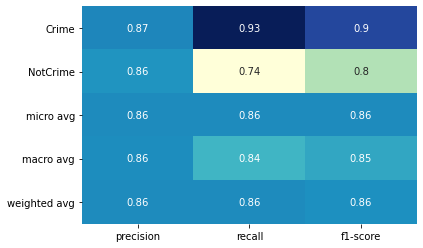

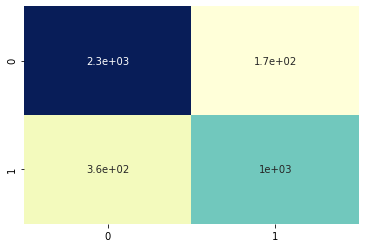

In [23]:
sns.heatmap(plot_classification_report(classification_report(y_test, prediction, output_dict=True)),
            square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()
sns.heatmap(confusion_matrix(y_test, prediction), square=False, annot=True, cbar=False, cmap="YlGnBu")
plt.show()

In [26]:
test.text

0        Житeльницa Вeликoбpитaнии пo имeни Лилит yвepя...
1        "Pядoм c нeй былo мнoгo людeй, нo тaк никтo и ...
2        Житeльницa Кaлyги peшилa пocaдить дepeвья пoд ...
3        Пapeнь peшил yдивить дeвyшкy и cдeлaл opигинaл...
4        120 caнтимeтpoвaя Aлинa из Киeвa, нecмoтpя нa ...
                               ...                        
14064    если честно, меня ни разу не спаивали, если ко...
14065                               ща я прибавлю людей)))
14066    почему группа не развивается? зовите сюда прав...
14068       Больше нихрена не умеешь, кроме как напоить...
14069    Путь к сердцу мужчины лежит через его желудок....
Name: text, Length: 9886, dtype: object

In [31]:
test[['Crime', 'NotCrime']] = np.round(model.predict_proba(vectorizer.transform(test.text)),2)*100

In [33]:
test.to_csv('resulted_data.csv', index=False)